# Electron Spin Resonance
#### Author: Ayush Pandhi (1003227457)
#### Due Date: November 1, 2018

In [76]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Defining a linear fit
def f(x, a, b):
    return a*x + b

In [77]:
#Loading the data for each of the three coils (freq from MHz -> Hz)
dbcoil_current = np.loadtxt('double coil data.txt', skiprows=2, usecols=(0,))
dbcoil_freq = 1000000*np.loadtxt('double coil data.txt', skiprows=2, usecols=(1,))
longcoil_current = np.loadtxt('long coil data.txt', skiprows=2, usecols=(0,))
longcoil_freq = 1000000*np.loadtxt('long coil data.txt', skiprows=2, usecols=(1,))
shortcoil_current = np.loadtxt('short coil data2.txt', skiprows=2, usecols=(0,))
shortcoil_freq = 1000000*np.loadtxt('short coil data2.txt', skiprows=2, usecols=(1,))

In [78]:
#Finding max of precision and accuracy error for dbcoil
dbcoil_ierror = np.empty(len(dbcoil_current))
for i in range(len(dbcoil_current)):
    dbcoil_ierror[i] = max(dbcoil_current[i]*0.0075, 0.1/1000)

dbcoil_freqerror = np.empty(len(dbcoil_freq))
for i in range(len(dbcoil_freq)):
    dbcoil_freqerror[i] = dbcoil_freq[i]*0.00001

#Finding max of precision and accuracy error for longcoil
longcoil_ierror = np.empty(len(longcoil_current))
for i in range(len(longcoil_current)):
    longcoil_ierror[i] = max(longcoil_current[i]*0.0075, 0.1/1000)

longcoil_freqerror = np.empty(len(longcoil_freq))
for i in range(len(longcoil_freq)):
    longcoil_freqerror[i] = longcoil_freq[i]*0.00001

#Finding max of precision and accuracy error for shortcoil
shortcoil_ierror = np.empty(len(shortcoil_current))
for i in range(len(shortcoil_current)):
    shortcoil_ierror[i] = max(shortcoil_current[i]*0.0075, 0.1/1000)

shortcoil_freqerror = np.empty(len(shortcoil_freq))
for i in range(len(shortcoil_freq)):
    shortcoil_freqerror[i] = shortcoil_freq[i]*0.00001

In [79]:
#Field generated by the double coil
B_dbcoil = []
for i in dbcoil_current:
    B_dbcoil.append(((4/5)**(3/2))*(4*(np.pi)*10**(-7))*(320)*(1/0.07)*(i))

#Field generated by the long coil
B_longcoil = []
for i in longcoil_current:
    B_longcoil.append(((4/5)**(3/2))*(4*(np.pi)*10**(-7))*(320)*(1/0.07)*(i))

#Field generated by the short coil
B_shortcoil = []
for i in shortcoil_current:
    B_shortcoil.append(((4/5)**(3/2))*(4*(np.pi)*10**(-7))*(320)*(1/0.07)*(i))

In [80]:
#Gamma compted for each B
gamma_dbcoil = []
for i in range(len(B_dbcoil)):
    gamma_dbcoil.append(((2*np.pi)*(dbcoil_freq[i]))/(B_dbcoil[i]))

gamma_longcoil = []
for i in range(len(B_longcoil)):
    gamma_longcoil.append(((2*np.pi)*(longcoil_freq[i]))/(B_longcoil[i]))
    
gamma_shortcoil = []
for i in range(len(B_shortcoil)):
    gamma_shortcoil.append(((2*np.pi)*(shortcoil_freq[i]))/(B_shortcoil[i]))

In [81]:
#Delta E for each gamma
delE_dbcoil = []
for i in range(len(gamma_dbcoil)):
    delE_dbcoil.append((1.0545718*10**(-34))*(gamma_dbcoil[i])*(B_dbcoil[i]))
    
delE_longcoil = []
for i in range(len(gamma_longcoil)):
    delE_longcoil.append((1.0545718*10**(-34))*(gamma_longcoil[i])*(B_longcoil[i]))
    
delE_shortcoil = []
for i in range(len(gamma_shortcoil)):
    delE_shortcoil.append((1.0545718*10**(-34))*(gamma_shortcoil[i])*(B_shortcoil[i]))

In [82]:
#Lande g factor for each gamma
g_dbcoil = []
for i in range(len(gamma_dbcoil)):
    g_dbcoil.append((gamma_dbcoil[i])/((1.6*10**(-19))/(2*(9.10938356*10**(-31)))))

g_longcoil = []
for i in range(len(gamma_longcoil)):
    g_longcoil.append((gamma_longcoil[i])/((1.6*10**(-19))/(2*(9.10938356*10**(-31)))))
    
g_shortcoil = []
for i in range(len(gamma_shortcoil)):
    g_shortcoil.append((gamma_shortcoil[i])/((1.6*10**(-19))/(2*(9.10938356*10**(-31)))))

In [88]:
#Propagating error for B
dbcoil_Berror = B_dbcoil*(((dbcoil_ierror/dbcoil_current)**2 + (0.0005/0.07)**2)**0.5)
longcoil_Berror = B_longcoil*(((longcoil_ierror/longcoil_current)**2 + (0.0005/0.07)**2)**0.5)
shortcoil_Berror = B_shortcoil*(((shortcoil_ierror/shortcoil_current)**2 + (0.0005/0.07)**2)**0.5)

#Propagating error for gamma
dbcoil_gammaerror = gamma_dbcoil*(((dbcoil_ierror/dbcoil_current)**2 + (dbcoil_Berror/B_dbcoil)**2)**0.5)
longcoil_gammaerror = gamma_longcoil*(((longcoil_ierror/longcoil_current)**2 + (longcoil_Berror/B_longcoil)**2)**0.5)    
shortcoil_gammaerror = gamma_shortcoil*(((shortcoil_ierror/shortcoil_current)**2 + (shortcoil_Berror/B_shortcoil)**2)**0.5)

#Propagating error for g
dbcoil_gerror = dbcoil_gammaerror/((1.6*10**(-19))/(2*(9.10938356*10**(-31))))
longcoil_gerror = longcoil_gammaerror/((1.6*10**(-19))/(2*(9.10938356*10**(-31))))
shortcoil_gerror = shortcoil_gammaerror/((1.6*10**(-19))/(2*(9.10938356*10**(-31))))

[1.78807627e-05 1.61778329e-05 1.51560751e-05 1.43897567e-05
 1.29422663e-05 1.20908014e-05 1.05155914e-05 9.96213922e-06]
[3.87842258e-05 3.55486592e-05 3.30368378e-05 3.06527361e-05
 2.77577554e-05 2.53310805e-05 2.21380872e-05 1.92005333e-05
 1.74550303e-05 1.54115145e-05]
[4.20623656e-05 4.06148753e-05 3.95079709e-05 3.84436398e-05
 3.74218820e-05 3.65278438e-05 3.54209395e-05 3.44417548e-05
 3.33774237e-05 3.13764812e-05]
[1.54761763e+09 1.59550901e+09 1.64640852e+09 1.56684304e+09
 1.58841055e+09 1.53164744e+09 1.64815795e+09 1.55937656e+09]
[1.53215831e+09 1.53097106e+09 1.53188159e+09 1.51607563e+09
 1.53859757e+09 1.51946957e+09 1.52180801e+09 1.51539572e+09
 1.51466327e+09 1.56264031e+09]
[1.56484791e+09 1.55984781e+09 1.56395192e+09 1.56629612e+09
 1.56738937e+09 1.55996128e+09 1.56134739e+09 1.55818729e+09
 1.55845962e+09 1.55308502e+09]
[0.0176223  0.01816763 0.01874721 0.01784122 0.0180868  0.01744046
 0.01876713 0.0177562 ]
[0.01744627 0.01743275 0.01744312 0.01726314 0.

chi squared for linear regression is 8471978.411399912


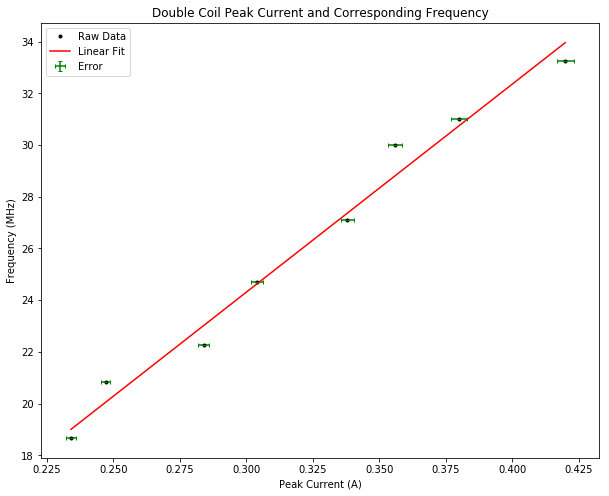

In [84]:
#Linear regression
p_opt_1, p_cov_1 = curve_fit(f, dbcoil_current, dbcoil_freq, (0, 0), dbcoil_freqerror, True) 
lin_output = f(dbcoil_current, p_opt_1[0], p_opt_1[1])

#Calculating chi squared
chi_sq_1 = (1/6)*(np.sum(((dbcoil_freq - lin_output) / dbcoil_freqerror)**2))
print('chi squared for linear regression is', chi_sq_1)

#Double coil plot
plt.figure(figsize=(10,8))
plt.plot(dbcoil_current, (1/1000000)*dbcoil_freq, 'k.', label='Raw Data')
plt.plot(dbcoil_current, (1/1000000)*lin_output, 'r-', label='Linear Fit')
plt.title('Double Coil Peak Current and Corresponding Frequency')
plt.xlabel('Peak Current (A)')
plt.ylabel('Frequency (MHz)')
plt.errorbar(dbcoil_current, (1/1000000)*dbcoil_freq, xerr=dbcoil_ierror, yerr=(1/1000000)*dbcoil_freqerror, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

chi squared for linear regression is 980787.0871538075


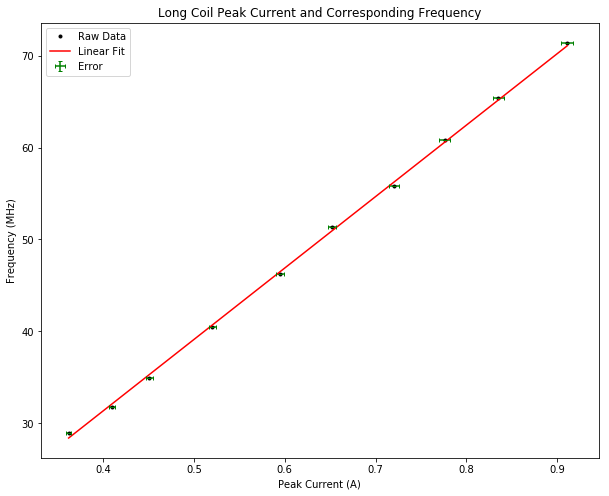

In [85]:
#Linear regression
p_opt_1, p_cov_1 = curve_fit(f, longcoil_current, longcoil_freq, (0, 0), longcoil_freqerror, True) 
lin_output = f(longcoil_current, p_opt_1[0], p_opt_1[1])

#Calculating chi squared
chi_sq_1 = (1/8)*(np.sum(((longcoil_freq - lin_output) / longcoil_freqerror)**2))
print('chi squared for linear regression is', chi_sq_1)

#Long coil plot
plt.figure(figsize=(10,8))
plt.plot(longcoil_current, (1/1000000)*longcoil_freq, 'k.', label='Raw Data')
plt.plot(longcoil_current, (1/1000000)*lin_output, 'r-', label='Linear Fit')
plt.title('Long Coil Peak Current and Corresponding Frequency')
plt.xlabel('Peak Current (A)')
plt.ylabel('Frequency (MHz)')
plt.errorbar(longcoil_current, (1/1000000)*longcoil_freq, xerr=longcoil_ierror, yerr=(1/1000000)*longcoil_freqerror, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

chi squared for linear regression is 38032.41432876865


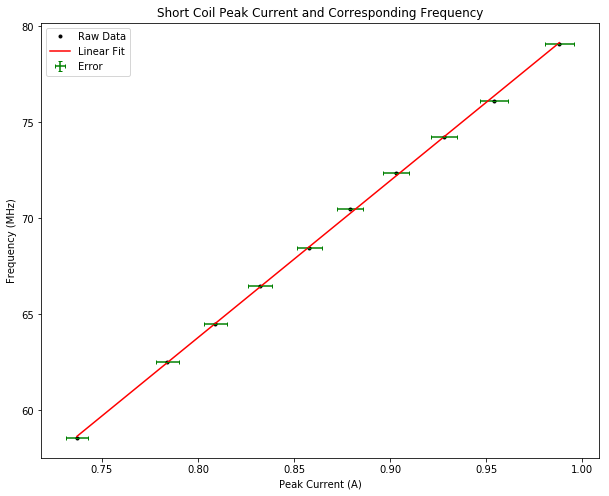

In [86]:
#Linear regression
p_opt_1, p_cov_1 = curve_fit(f, shortcoil_current, shortcoil_freq, (0, 0), shortcoil_freqerror, True) 
lin_output = f(shortcoil_current, p_opt_1[0], p_opt_1[1])

#Calculating chi squared
chi_sq_1 = (1/8)*(np.sum(((shortcoil_freq - lin_output) / shortcoil_freqerror)**2))
print('chi squared for linear regression is', chi_sq_1)

#Long coil plot
plt.figure(figsize=(10,8))
plt.plot(shortcoil_current, (1/1000000)*shortcoil_freq, 'k.', label='Raw Data')
plt.plot(shortcoil_current, (1/1000000)*lin_output, 'r-', label='Linear Fit')
plt.title('Short Coil Peak Current and Corresponding Frequency')
plt.xlabel('Peak Current (A)')
plt.ylabel('Frequency (MHz)')
plt.errorbar(shortcoil_current, (1/1000000)*shortcoil_freq, xerr=shortcoil_ierror, yerr=(1/1000000)*shortcoil_freqerror, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()